 **Install and Import Libraries**

In [11]:
%pip install pandas scikit-learn joblib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import os

**Load & Clean Data**

In [13]:
df = pd.read_csv("../data/raw/synthetic_cardio_health_data.csv")
df.head()

,user_id,date,RestingHeartRate,HeartRate,WalkingHeartRate,HeartRateVariability,DistanceWalkingRunning,ActiveEnergyBurned,VO2Max,FlightsClimbed,cardio_status
0,u001,2024-01-01,76.6,61.3,102.9,35.3,5.47,344.6,38.1,10.0,Average
1,u001,2024-01-02,67.9,79.6,92.7,28.4,5.62,363.0,36.1,8.0,Average
2,u001,2024-01-03,90.8,94.9,110.0,18.6,1.41,217.7,28.0,2.0,At Risk
3,u001,2024-01-04,56.2,56.8,85.1,64.2,10.01,501.9,47.1,19.0,Fit
4,u001,2024-01-05,70.8,88.1,106.6,27.1,2.19,250.1,28.1,4.0,At Risk


In [14]:
features = [
    "RestingHeartRate",
    "HeartRate",
    "WalkingHeartRate",
    "VO2Max",
    "DistanceWalkingRunning",
    "ActiveEnergyBurned",
    "FlightsClimbed"
]
target = "cardio_status"

df.dropna(subset=features + [target], inplace=True)

**Prepare Training Model**

In [15]:
X = df[features]
y = df[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the Model**

In [18]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.9978

Confusion Matrix:
[[602   0   0]
 [  0 618   1]
 [  0   3 576]]

Classification Report:
              precision    recall  f1-score   support

     At Risk       1.00      1.00      1.00       602
     Average       1.00      1.00      1.00       619
         Fit       1.00      0.99      1.00       579

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



**Confusion Matrix (using Seaborn)**

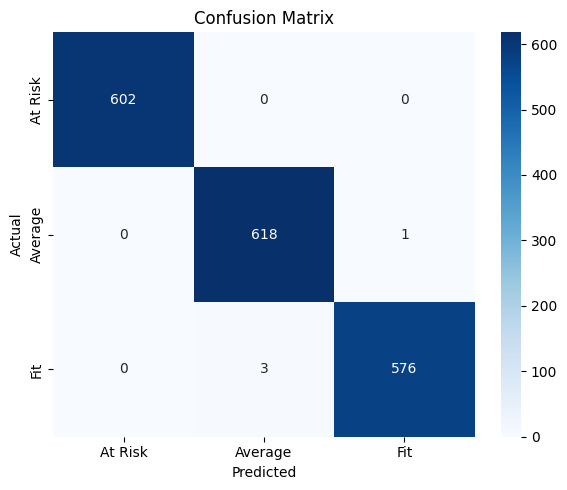

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

labels = model.classes_

cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


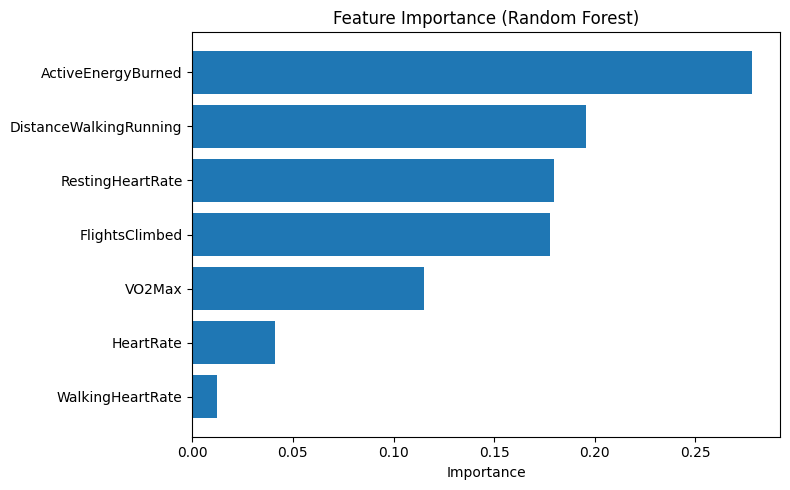

In [20]:
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Cell Interpertation**

In [21]:
acc = accuracy_score(y_test, y_pred)
print(f"✅ Overall Accuracy: {round(acc*100, 2)}%")

# Short explanation
if acc > 0.9:
    performance = "Excellent"
elif acc > 0.8:
    performance = "Very good"
elif acc > 0.7:
    performance = "Acceptable"
else:
    performance = "Needs improvement"

print(f"\n🔍 Model Performance: {performance}")
print("\nThis model predicts cardiovascular fitness levels (Fit, Average, At Risk) using features like heart rate, VO₂ Max, walking distance, etc.")
print("Higher feature importance values indicate which metrics the model relied on most.\n")

# Print top 3 features
top_features = [feature_names[i] for i in indices[:3]]
print(f"📌 Most influential features: {', '.join(top_features)}")


✅ Overall Accuracy: 99.78%

🔍 Model Performance: Excellent

This model predicts cardiovascular fitness levels (Fit, Average, At Risk) using features like heart rate, VO₂ Max, walking distance, etc.
Higher feature importance values indicate which metrics the model relied on most.

📌 Most influential features: ActiveEnergyBurned, DistanceWalkingRunning, RestingHeartRate


**Save the Model**

In [22]:
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/cardio_rf_model.pkl")
print("✅ Model saved to '../models/cardio_rf_model.pkl'")

✅ Model saved to '../models/cardio_rf_model.pkl'
